In [1]:
import numpy as np
import torch
import pyro
import pyro.distributions as dist
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 0.7,0.7

In [2]:
def sample_point(w,h):
    x_prob = pyro.sample(f"x_prob", dist.Dirichlet(torch.ones(w)))
    y_prob = pyro.sample(f"y_prob", dist.Dirichlet(torch.ones(h)))
    x = pyro.sample(f"x", dist.Categorical(x_prob))
    y = pyro.sample(f"y", dist.Categorical(y_prob))
    return x,y

In [3]:
def sample_rectangle(w,h):
    n_points = 2
    with pyro.plate('P', n_points):
        x,y = sample_point(w,h)
    color_intensity = pyro.sample("color_intensity",dist.Beta(0.5,0.5))
    return x,y,color_intensity

In [4]:
def sample_image(X):
    w,h = X.shape
    img = torch.ones((w,h))
    x,y,color_intensity = sample_rectangle(w,h)
    img[x[0]:x[0]+x[1],y[0]:y[0]+y[1]] = color_intensity
    X = pyro.sample("obs", dist.Normal(img,0.05))
    return X

In [5]:
w,h = 40,50
img = sample_image(torch.ones(w,h))

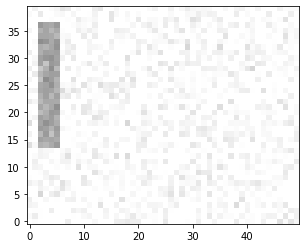

In [6]:
plt.imshow(img,cmap='gray',vmin=0,vmax=1,origin='lower')

In [7]:
foo = pyro.poutine.trace(sample_image).get_trace(img)

In [8]:
foo.nodes

OrderedDict([('_INPUT',
              {'name': '_INPUT',
               'type': 'args',
               'args': (tensor([[0.9968, 0.9869, 1.0201,  ..., 0.9776, 0.8967, 0.9623],
                        [0.9818, 0.9287, 0.9934,  ..., 0.8951, 1.0290, 0.9442],
                        [1.0251, 0.9932, 0.9939,  ..., 1.1447, 0.9289, 0.9482],
                        ...,
                        [1.0238, 1.0422, 1.0396,  ..., 0.8926, 1.0356, 1.0186],
                        [0.9767, 1.0741, 0.9168,  ..., 1.0690, 0.9371, 1.0542],
                        [1.0697, 0.9494, 1.0610,  ..., 0.9849, 0.9830, 0.9821]]),),
               'kwargs': {}}),
             ('P',
              {'type': 'sample',
               'name': 'P',
               'fn': <pyro.poutine.subsample_messenger._Subsample at 0x7fa819df4f98>,
               'is_observed': False,
               'args': (),
               'kwargs': {},
               'value': tensor([0, 1]),
               'infer': {},
               'scale': 1.0,
    